In [ ]:
#Ex 5 ML Coursera

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from sklearn import svm
import scipy.io
from scipy.optimize import fmin_cg

In [51]:
####=========== Part 1: Loading and Visualizing Data =============


##Loading data and create basis vars
data = scipy.io.loadmat('ex5data1.mat')
X = pd.DataFrame(data["X"])
y = pd.DataFrame(data["y"])
Xval = pd.DataFrame(data["Xval"])
yval = pd.DataFrame(data["yval"])
Xtest = pd.DataFrame(data["Xtest"])
ytest = pd.DataFrame(data["ytest"])

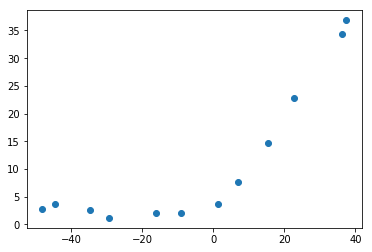

In [17]:
#Visualization of data
plt.scatter(X,y)

In [56]:
Xn = X
Xnval = Xval
theta = np.array([1,1])

In [53]:
Xn.insert(0,"x0",1)
Xnval.insert(0,"x0",1)

In [134]:
#=========== Part 2: Regularized Linear Regression Cost =============
linearRegCostFunction_J(Xn, y, 1)(theta)
#=========== Part 3: Regularized Linear Regression Gradient =============
linearRegCostFunction_G(Xn, y, 1)(theta)
#=========== Part 4: Train Linear Regression =============
thetas_lg=trainLinearReg(Xn, y, 1) 

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


array([13.08771416,  0.367742  ])

In [135]:
#==============Appendix = Necessary Functions =========================
def linearRegCostFunction_J(X, y, l):
    def J_func(theta):
        m = len(X)
        sqrErrors = np.square(np.dot(X,theta)-np.array(y).ravel())
        J = (1/(2*m))*sum(sqrErrors)
        theta_reg = np.array(theta)
        theta_reg = np.square(theta_reg)
        theta_reg[0]=0
        theta_reg = sum(theta_reg)
        reg = (l/(2*m))*theta_reg
        J = J+reg
        return(J)
    return J_func

def linearRegCostFunction_G(X,y,l):
    def grad_func(theta):
        m = len(X)
        theta_reg = np.array(theta)
        theta_reg[0] = 0
        error = np.dot(X,theta)-np.array(y).ravel()
        grad = (1/m)*np.dot(np.transpose(error),Xn)+(l/m)*theta_reg
        return grad
    return grad_func

def trainLinearReg(X,y,l):
    incostFunction=linearRegCostFunction_J(X, y, l)
    ingradFunction=linearRegCostFunction_G(X, y, l)
    init_theta = np.repeat(0, X.shape[1])
    opt = fmin_cg(incostFunction, init_theta,ingradFunction)
    return opt


array([13.08771416,  0.367742  ])